# RingVCO

MakeLSIで載せてもらった5段リングオシレータVCOを動作させてみた

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='png'
import pylab as pl
import numpy as np
import matplotlib as mpl
mpl.rcParams['axes.grid'] = True

## Vdd=Vctrlの条件でIddと周波数を計測

電源電圧を変えながら、電流測定は電源で、周波数はオシロで読む。結果はテキストファイルにしておいた。

In [9]:
%cat vdd-idd-freq.txt

#Vdd Idd Freq
1.0 0.027 1.5
1.5 0.094 5.2
2.0 0.23 9.9
3.0 0.67 19.6
4.0 1.31 28.5
5.0 2.09 36.0
6.0 3.00 42.6
7.0 4.05 48.2
8.0 5.22 52.9
9.0 6.45 57.3

テキストファイルから結果を読みこむ

In [5]:
d = np.loadtxt('vdd-idd-freq.txt', dtype={'names':('vdd','idd','freq'), 'formats':('f','f','f')})

グラフにプロット

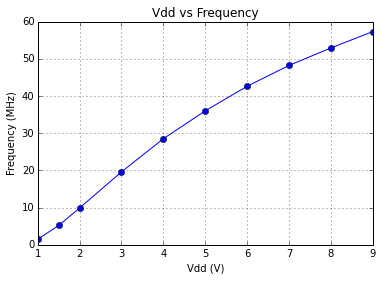

In [22]:
pl.title('Vdd vs Frequency')
pl.xlabel('Vdd (V)')
pl.ylabel('Frequency (MHz)')
pl.plot(d['vdd'], d['freq'], marker='o');

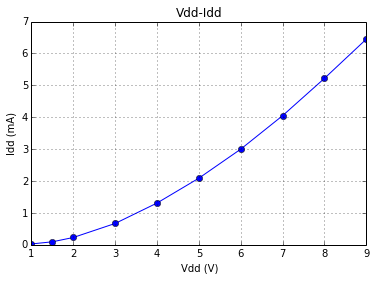

In [20]:
pl.title('Vdd-Idd')
pl.xlabel('Vdd (V)')
pl.ylabel('Idd (mA)')
pl.plot(d['vdd'], d['idd'], marker='o');

## Vdd固定でVctrl vs Freqを計測

Vddは5Vが仕様とのことなので、Vddを5Vに固定し、Vctrlを振って周波数を計ってみた。

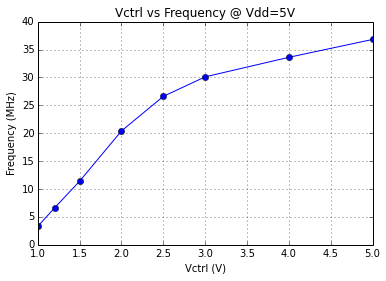

In [8]:
d = np.loadtxt('vctrl-freq.txt', dtype={'names':('vdd','freq'), 'formats':('f','f')})
pl.title('Vctrl vs Frequency @ Vdd=5V')
pl.xlabel('Vctrl (V)')
pl.ylabel('Frequency (MHz)')
pl.plot(d['vdd'], d['freq'], marker='o');

## 出力波形

上がVCOOut, 下がDivOut。Vctrl=5V, Vdd=5V。

![出力波形](waveform-vctrl5v.png)

## RingVCOの中身と実装

リングオシレータ部分の回路
![](files/RingVCO-core-sch.png)

(http://jaco.ec.t.kanazawa-u.ac.jp/edu/islab2/vco.html から引用)

リングオシレータ部分のレイアウト
![](files/RingVCO-core-layout.png)

2分周の回路
![](files/TSPC-Div2-sch.png)

(RFマイクロエレクトロニクス 第2版 実践応用編 http://amzn.to/1D9LAUH pp326 から引用)

リングオシレータ全体のレイアウト
![](files/RingVCO-layout.png)

リングオシレータの写真
![](https://raw.githubusercontent.com/MakeLSI/ChipPhoto/master/15MkLSI1-1.jpg)

チップ写真
![](https://github.com/MakeLSI/ChipPhoto/blob/master/15MkLSI1.jpg?raw=true)

パッケージ写真
![パッケージ写真](files/photo-package.jpg)

汎用基板に実装
![汎用基板に実装](files/photo-board.jpg)

チップ|ピン|回路|信号
:---:|:--:|:--:|:--:
1|64|RingVCO|Vdd
1|58|RingVCO|GND
1|63|RingVCO|Vctrl
1|3|RingVCO|VCOOut
1|4|RingVCO|DivOut

設計参加報告: http://ttrftech.tumblr.com/post/125292593841/